
Quantum NLP Encoding Circuit:


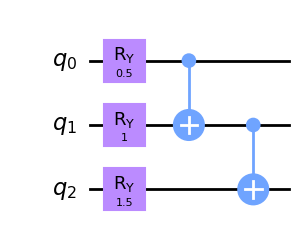


Quantum Statevector Representation of NLP Encoding:


Matrix([
[0.6222],
[0.0868],
[0.3166],
[ 0.148],
[0.5796],
[0.0809],
[0.3399],
[0.1589]])

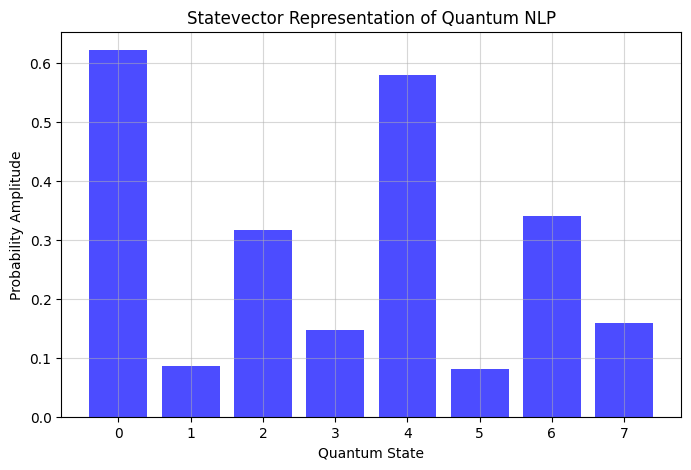

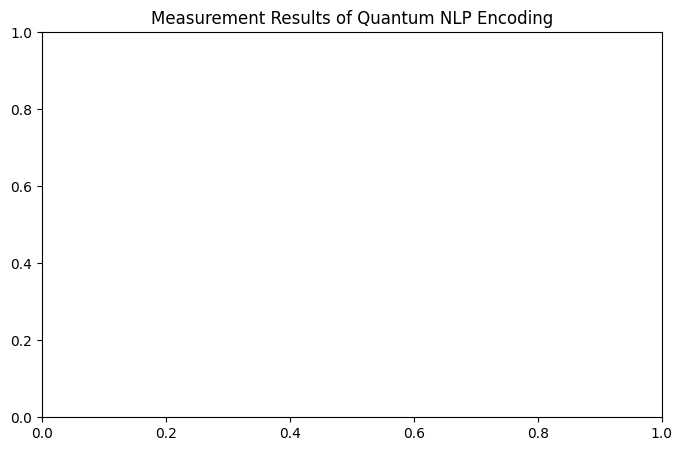

In [1]:
#-------------------------------------------------------------------------
# Quantum NLP with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import circuit_drawer, plot_histogram
from qiskit.quantum_info import Statevector
#-------------------------------------------------------------------------

def sprint(Matrix, decimals=4):
    """ Prints a Matrix with real and imaginary parts rounded to 'decimals' """
    import sympy as sp
    SMatrix = sp.Matrix(Matrix)  # Convert to Sympy Matrix if it's not already

    def round_complex(x):
        """Round real and imaginary parts of x to the given number of decimals."""
        c = complex(x)  # handle any real or complex Sympy expression
        r = round(c.real, decimals)
        i = round(c.imag, decimals)
        # If imaginary part is negligible, treat as purely real
        if abs(i) < 10**(-decimals): return sp.Float(r)
        else: return sp.Float(r) + sp.Float(i)*sp.I

    # Display the rounded Sympy Matrix
    display(SMatrix.applyfunc(round_complex))
    return

#-------------------------------------------------------------------------
# Visualization Functions
#-------------------------------------------------------------------------

# Function to plot the quantum circuit
def plot_quantum_circuit(qc):
    print("\nQuantum NLP Encoding Circuit:")
    display( circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'}) )

# Function to visualize the statevector
def simulate_statevector(qc):
    simulator = Aer.get_backend("statevector_simulator")
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc)
    result = job.result()
    statevector = result.get_statevector()

    # Display statevector
    print("\nQuantum Statevector Representation of NLP Encoding:")
    sprint(statevector)

    # Plot probability amplitudes
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of Quantum NLP")
    plt.grid(alpha=0.5)
    plt.show()

# Function to measure qubits and show probability distribution
def measure_and_plot(qc):
    qc_measure = qc.copy()
    qc_measure.measure_all()

    simulator = Aer.get_backend("aer_simulator")
    transpiled_qc = transpile(qc_measure, simulator)
    job = simulator.run(transpiled_qc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of Quantum NLP Encoding")
    plt.show()

#-------------------------------------------------------------------------
# Define a quantum circuit for NLP encoding
#-------------------------------------------------------------------------
qc = QuantumCircuit(3)

# Encode three words into quantum states using parameterized rotations
qc.ry(0.5, 0)
qc.ry(1.0, 1)
qc.ry(1.5, 2)

# Add entanglement to represent contextual dependencies between words
qc.cx(0, 1)
qc.cx(1, 2)

#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(qc)
simulate_statevector(qc)
measure_and_plot(qc)
